In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../1d_fixed_beta_heavy_tail/1d_fixed_results_tdist.csv')
df.head()

,n,contamination_level,ctam_df,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,robust_s_est_variance,...,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,ols_est_mse,robust_m_est_mse,robust_mm_est_mse,robust_s_est_mse,ols_diag_est_mse
0,200,0.0,1,4,0.007548,0.005070,0.007550,0.005074,0.012727,0.014556,...,1.018251,1.019071,1.019026,1.042853,1.020322,0.004814,0.005102,0.005105,0.014645,0.006173
1,200,0.0,2,4,0.000118,0.006720,0.000184,0.006793,0.002575,0.023134,...,1.007321,1.007697,1.007816,1.033774,1.010112,0.006440,0.006686,0.006759,0.023025,0.008680
2,200,0.0,5,4,-0.004496,0.005151,-0.004494,0.005124,-0.003194,0.018395,...,1.015112,1.015943,1.016081,1.043516,1.017990,0.004769,0.005145,0.005119,0.018313,0.006261
3,200,0.0,10,4,-0.001127,0.004625,-0.000081,0.004653,0.003726,0.016265,...,1.002106,1.002192,1.002133,1.024441,1.003658,0.004483,0.004603,0.004630,0.016197,0.005851
4,200,0.0,20,4,0.001173,0.004659,0.001363,0.004663,-0.003129,0.016978,...,1.015305,1.015797,1.015783,1.039994,1.019384,0.004535,0.004637,0.004641,0.016903,0.007191


In [4]:
df.columns

Index(['n', 'contamination_level', 'ctam_df', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_mm_est_bias',
       'robust_mm_est_variance', 'robust_s_est_bias', 'robust_s_est_variance',
       'ols_est_bias', 'ols_est_variance', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe',
       'robust_s_mspe', 'ols_diag_mspe', 'ols_est_mse', 'robust_m_est_mse',
       'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse'],
      dtype='object')

In [5]:
feature_columns = ['n', 'contamination_level', 'ctam_df', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [6]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_df,cook_cutoff,method,mpse
0,200,0.0,1,4,ols,1.018251
1,200,0.0,2,4,ols,1.007321
2,200,0.0,5,4,ols,1.015112
3,200,0.0,10,4,ols,1.002106
4,200,0.0,20,4,ols,1.015305


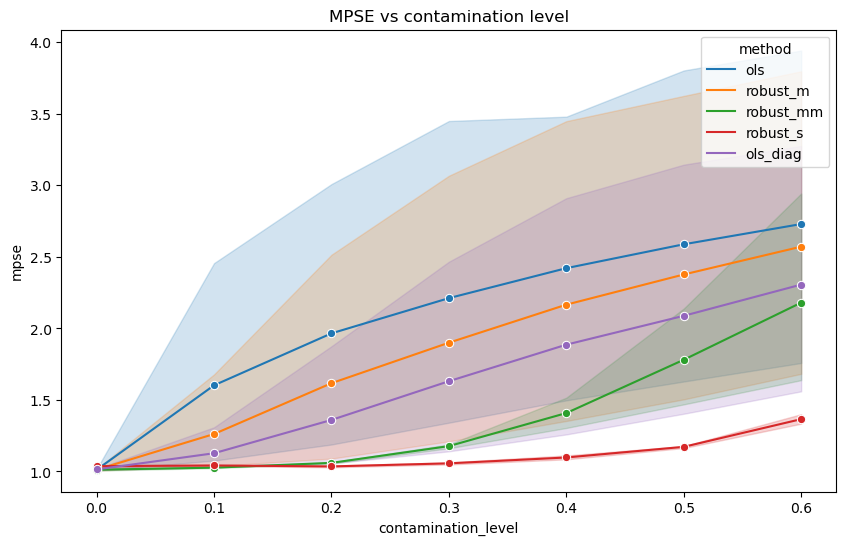

In [7]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MPSE vs contamination level')
plt.show()